# Chapter 10: Position and Momentum
We can start using sympy to handle symbolic math (integrals and other calculus):

In [1]:
from sympy import *

In [2]:
init_printing(use_unicode=True)

In [3]:
x, y, z = symbols('x y z', real=True)
a, c = symbols('a c', nonzero=True, real=True)

There are two ways to use the `integrate` function. In one line, like `integrate(x,(x,0,1))` or by naming an expression and then integrating it over a range:

```
A = (c*cos((pi*x)/(2.0*a)))**2
A.integrate((x,-a,a),conds='none')
```

We'll use both, at different times. For longer expressions, the second form can be easier to read and write.

First, just try the following, then we'll re-create some examples in the book.

In [5]:
integrate(x,(x,0,1))

In [6]:
integrate(x**2,(x,0,1))

The cell below will return an odd set of conditions on the result. This is because the solver doesn't want to assume anything about `a` and there is a special case where the answer would be different. If you look closely though, that special case isn't physically realistic so to igore these special conditions, we add `conds='none'`. The next cell down does what you'd expect. From here on out, just add this to the `integrate` function and we'll get what we expect.

In [7]:
A = (c*cos((pi*x)/(2.0*a)))**2
A.integrate((x,-a,a))

In [8]:
A = (c*cos((pi*x)/(2.0*a)))**2
A.integrate((x,-a,a), conds='none')

So this tells us the normalization constant should be $c=\frac{1}{\sqrt{a}}$. Check that it is normalized if we do that:

In [9]:
psi = 1/sqrt(a)*cos((pi*x)/(2.0*a))  # notice we can name the expression something useful.
B = psi**2
B.integrate( (x,-a,a), conds='none')

Because `psi` is a real function, we can calculate expectation values by integrating over $x$ or $x^2$ with `psi**2`:

In [10]:
C = x*psi**2
C.integrate( (x,-a,a), conds='none')

In [11]:
D = x**2 * psi**2
E = D.integrate( (x,-a,a), conds='none')

In [12]:
E.n()  # the .n() method approximates the numerical part. You can look at the full expression below.

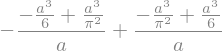

In [13]:
E

## Example 10.2

In [14]:
h = Symbol('hbar', real=True)

Use the `diff` function to take a derivative of a symbolic expression. For example:

In [15]:
diff(x**2, x)

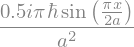

In [16]:
# Solution
-1j*h*diff( 1/a*cos((pi*x)/(2*a)) ,x)

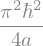

In [17]:
# Solution
B1 = (pi*h/(2*a))**2 * (cos((pi*x)/(2*a)))**2
B1.integrate( (x,-a,a), conds='none' )

## Example 10.3

In [18]:
p = Symbol('p', real=True) 

In [19]:
# Solution
A = integrate(1/sqrt(2*pi*a*h)*exp(-I*p*x/h)*cos((pi*x)/(2*a)),(x,-a,a), conds='none')

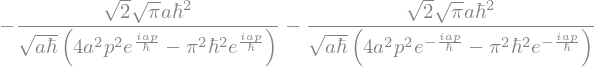

In [20]:
# Solution
A

In [21]:
psi_p = sqrt(2*a*pi/h) * 2/(pi**2 - (2*p*a/h)**2) * cos(p*a/h)

This is as far as we can go in sympy. Unfortunately, any other momentum integrals choke. Off to sage math and the maxima algebra engine that runs it.